<a href="https://colab.research.google.com/github/DeryFerd/Machine-Learning-Project/blob/main/Codes/XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Load Dataset

In [2]:
df = pd.read_csv("https://bit.ly/3XSpt0Y")
print('Total Row : ', len(df))
df.head()

Total Row :  924


,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


# Data and Business Understanding

Business Understanding:
1. Is there a strong correlation between price and area and room?
2. What is the distribution of house prices? Is there any relationship with the area?
3. What is the highest number of rooms in the house price data?

Dataset Explanation:

The housing prices have been obtained from Pararius.nl as a snapshot in August 2021. The original data provided features such as price, floor area and the number of rooms. The data has been further enhanced by utilising the Mapbox API to obtain the coordinates of each listing.

The target of this dataset is to predict the House Price based on their rooms and area.


1. Address = Residential address.

2. Zip = Residential Zip code.

3. Price = Residential price in Euros.

4. Area = Residential area in square meters.

5. Room = Number of rooms at residence.

6. Lon = Longitude coordinates.

7. Lat = Latitude coordinates.

# Data Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  924 non-null    int64  
 1   Address     924 non-null    object 
 2   Zip         924 non-null    object 
 3   Price       920 non-null    float64
 4   Area        924 non-null    int64  
 5   Room        924 non-null    int64  
 6   Lon         924 non-null    float64
 7   Lat         924 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 57.9+ KB


## Missing Values Handling

In [4]:
df.isnull().sum()

Unnamed: 0    0
Address       0
Zip           0
Price         4
Area          0
Room          0
Lon           0
Lat           0
dtype: int64

we have 4 missing values in price column. Since the missing values are low, we will remove the rows that contain those missing values.

In [5]:
df = df.dropna(subset=['Price'])

In [6]:
df.isnull().sum()

Unnamed: 0    0
Address       0
Zip           0
Price         0
Area          0
Room          0
Lon           0
Lat           0
dtype: int64

## Change Datatype

In [7]:
df['Price'] = df['Price'].astype('int64')

to make processing data easier, we change the Price column from float64 to int64 (integer).

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 0 to 923
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  920 non-null    int64  
 1   Address     920 non-null    object 
 2   Zip         920 non-null    object 
 3   Price       920 non-null    int64  
 4   Area        920 non-null    int64  
 5   Room        920 non-null    int64  
 6   Lon         920 non-null    float64
 7   Lat         920 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 64.7+ KB


In [9]:
columns_to_drop = ['Unnamed: 0', 'Address', 'Zip', 'Lon', 'Lat']
data = df.drop(columns_to_drop, axis=1)
data.head()

,Price,Area,Room
0,685000,64,3
1,475000,60,3
2,850000,109,4
3,580000,128,6
4,720000,138,5


we remove unnecessary columns such as address, zip, lon, lat, and unnamed column.

# Exploratory Data Analysis

## Correlation

<Axes: >

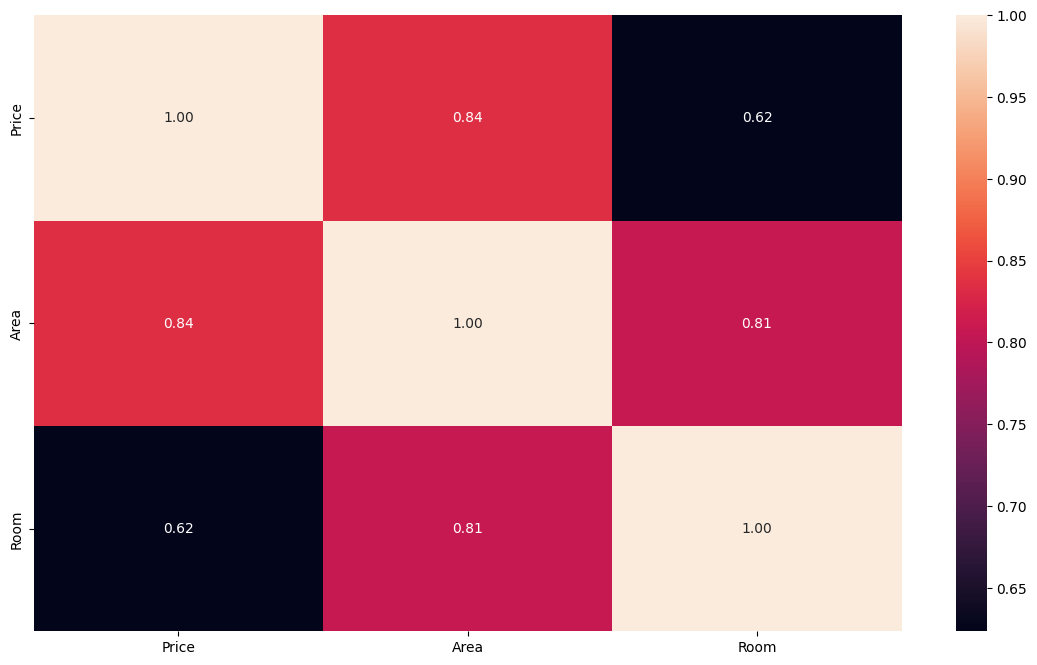

In [10]:
plt.figure(figsize=(14, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f')

We can see that each variable has a strong correlation, and column with the highest correlation with Price is Area.

## Price Analysis

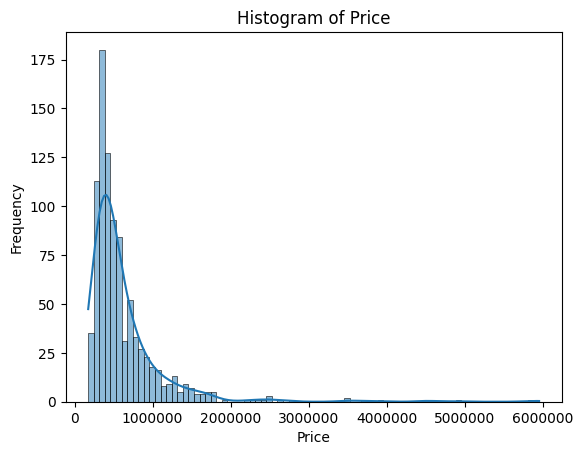

In [11]:
sns.histplot(data=data, x='Price', kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')

plt.ticklabel_format(style='plain', axis='x')

plt.show()

The distribution of house prices is spread below 1,000,000; with the peak being around 500,000.

## Room Analysis

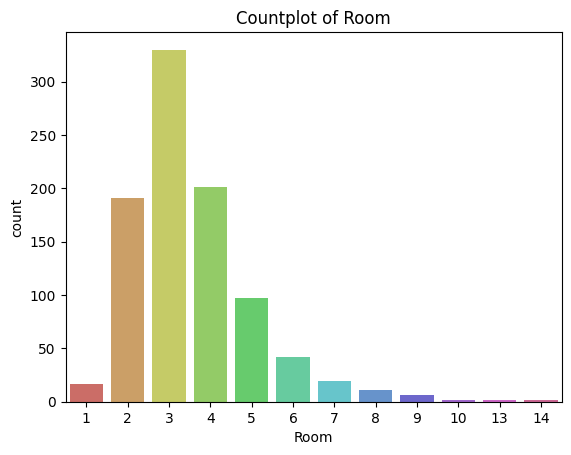

<Figure size 640x480 with 0 Axes>

In [12]:
sns.countplot(x = 'Room', data=data, palette='hls')
plt.title('Countplot of Room')
plt.show()
plt.savefig('count plot')


The highest number of rooms in this housing data is 3 rooms.

## Area and Price Correlation

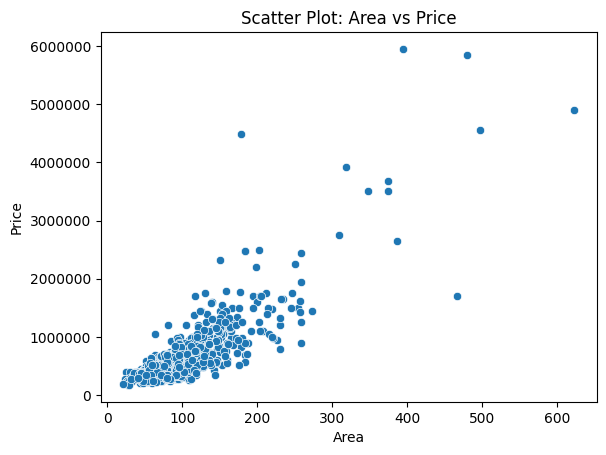

In [13]:
sns.scatterplot(data=data, x='Area', y='Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Scatter Plot: Area vs Price')

plt.ticklabel_format(style='plain', axis='y')

plt.show()

From this visualization, we can assume that there is a linear relationship between the area and the price, where the larger the house area, the higher the price of the house.

# Modelling

## Split Train-Test Dataset

In [14]:
from sklearn.model_selection import train_test_split
y = data['Price']
X = data.drop(labels='Price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

We split the dataset into 80% for training and 20% for test.

## XGBoost Model

In [19]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Membuat model XGBoost
gbm = xgb.XGBRegressor(max_depth=3, n_estimators=300, learning_rate=0.05)

# Melatih model pada data latih
gbm.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = gbm.predict(X_test)
y_pred


array([ 581107.1 ,  800154.5 ,  442271.2 ,  422205.66,  469782.28,
       1763714.1 ,  744824.7 ,  490225.53, 1080610.1 , 1544610.2 ,
        379088.34,  449679.75,  748347.25,  924873.4 ,  326563.28,
        430365.44,  429625.25,  519246.94,  326563.28,  435830.84,
        532466.  ,  396203.9 ,  400286.56,  581107.1 , 1770193.6 ,
        379088.34,  850485.6 ,  326563.28,  246811.98, 1552733.  ,
        425729.34,  761624.6 ,  594134.06,  606391.8 ,  365556.25,
        347040.88,  326563.28,  945077.2 ,  467140.28,  915838.2 ,
        469451.2 ,  402231.8 ,  375666.7 ,  326563.28,  429625.25,
        347040.88,  291547.53, 1129374.6 ,  347040.88,  629417.  ,
        365556.25,  382671.8 ,  446521.47,  542578.9 ,  536146.44,
        375497.47,  469782.28,  379088.34,  392613.03,  449679.75,
        519246.94,  429625.25, 1249754.  , 1015898.06, 1090431.8 ,
        347040.88,  449679.75,  773219.6 ,  375666.7 ,  421691.78,
        430365.44,  532466.  ,  681056.7 ,  326563.28,  365556

We implement XGBoost on our training data and test it using the test data.

# Model Evaluation

In [20]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 104264041778.95546
Root Mean Squared Error (RMSE): 322899.42982135393
Mean Absolute Error (MAE): 171636.92255434784
R-squared (R2): 0.5183668417289655



We obtained an R-squared of 0.5183668417289655, which means the model is able to explain approximately 51.83% of the variance in our dataset. We want to improve our model using cross-validation to achieve better results.

# Cross Validation

In [22]:
from sklearn.model_selection import cross_val_score

gbm = xgb.XGBRegressor(max_depth=3, n_estimators=300, learning_rate=0.05)

cv_scores = cross_val_score(gbm, X_train, y_train, cv=5, scoring='r2')

mean_r2 = np.mean(cv_scores)
std_r2 = np.std(cv_scores)

print("Cross-Validation Results R-squared (R2):")
print("Mean R2:", mean_r2)
print("Standard Deviation of R2:", std_r2)

Cross-Validation Results R-squared (R2):
Mean R2: 0.49480021398390894
Standard Deviation of R2: 0.2559894749574443


Surprisingly, with the use of cross-validation, the R-squared of our model actually decreased to 49.48%. This means the best-performing model is the XGBoost model without cross-validation, with an R-squared of 51.83%.

# Summary

so we can conclude that:

- There is a strong correlation between price and area and also room.
- The distribution of house prices is right-skewed, indicating that house prices tend to be lower. The correlation between price and area forms a linear relationship, meaning that as the area increases, the house price also increases.
- 3 is the highest number of rooms.
- We obtained our first model, XGBoost without cross-validation, with an R-squared of 51.83%. This means the model is able to explain 51.83% of the variance in our dataset.
- We want to improve our model with cross validation but the R-squared of our model actually decreased to 49.48%. There are several possible reasons why the R-squared of the XGBoost model decreased after using cross-validation:

1. Data Variability: Cross-validation involves splitting the data into multiple subsets (folds) and training the model on different combinations of training and validation sets. This can introduce variations in the training process, and the model may not perform consistently across all folds due to differences in data distribution.

2. Model Generalization: The original XGBoost model might have overfitted the training data, resulting in a high R-squared. When using cross-validation, the model is evaluated on different subsets of data, which could reveal its lack of generalization to unseen data and lead to a lower R-squared.

3. Limited Data Size: If the dataset is relatively small, cross-validation may not provide stable results, and the R-squared estimates could be more sensitive to fluctuations in the data.

4. Hyperparameter Tuning: The initial XGBoost model might have been trained with specific hyperparameters that happened to work well for the given dataset. During cross-validation, different hyperparameter settings could be tested, leading to a less optimal model for this specific dataset.

5. Model Complexity: Cross-validation might reveal that a simpler model could perform better than the original XGBoost model. A complex model could capture noise in the training data, resulting in a drop in performance on unseen data.